In [76]:
import pandas as pd
import io
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

In [77]:
data_string= """Email_ID	Content	win	click	team	claim	reminder Category
1				"Click here to win a special prize!"	1	1	0	0	0	Spam
2				"Team meeting rescheduled. Check the portal and click for details."	0	1	1	0	0	Ham
3				"Claim your free vacation package now!"	0	0	0	1	0	Spam
4				"A reminder for tomorrow's team-building exercise."	0	0	1	0	1	Ham
5				"Win a brand new car by participating in our survey!"	1	0	0	0	0	Spam
6				"The reminder for project deadlines is attached."	0	0	0	0	1	Ham
7				"Join our team and win exciting bonuses!"	1	0	1	0	0	Spam
8				"Click on the link for the annual team outing details."	0	1	1	0	0	Ham
9				"Last chance to claim your lottery money!"	0	0	0	1	0	Spam
10				"The team has shared the minutes of the meeting. Click to access."	0	1	1	0	0	Ham
11				"Team's quarterly review is scheduled for next Monday."	0	0	1	0	0	Ham
12				"You won't believe how this single trick can help you win cash!"	1	0	0	0	0	Spam
13				"Click here to review the latest project updates."	0	1	0	0	0	Ham
14				"Exclusive offer! Claim your free gift card now."	0	0	0	1	0	Spam
15				"Reminder: Year-end team gathering is on the 20th."	0	0	1	0	1	Ham """

In [78]:
df = pd.read_csv(io.StringIO(data_string), delim_whitespace=True)


<ipython-input-78-cb1675032283>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO(data_string), delim_whitespace=True)


In [79]:
df

,Email_ID,Content,win,click,team,claim,reminder,Category
0,1,Click here to win a special prize!,1,1,0,0,0,Spam
1,2,Team meeting rescheduled. Check the portal and...,0,1,1,0,0,Ham
2,3,Claim your free vacation package now!,0,0,0,1,0,Spam
3,4,A reminder for tomorrow's team-building exercise.,0,0,1,0,1,Ham
4,5,Win a brand new car by participating in our su...,1,0,0,0,0,Spam
5,6,The reminder for project deadlines is attached.,0,0,0,0,1,Ham
6,7,Join our team and win exciting bonuses!,1,0,1,0,0,Spam
7,8,Click on the link for the annual team outing d...,0,1,1,0,0,Ham
8,9,Last chance to claim your lottery money!,0,0,0,1,0,Spam
9,10,The team has shared the minutes of the meeting...,0,1,1,0,0,Ham


In [80]:
from sklearn.feature_extraction.text import CountVectorizer
specific_words = ["win", "click", "team","claim","reminder"]


In [81]:
vectorizer = CountVectorizer(vocabulary=specific_words)


In [82]:
X = vectorizer.fit_transform(df['Content'])
result_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


In [83]:
print(result_df)


    win  click  team  claim  reminder
0     1      1     0      0         0
1     0      1     1      0         0
2     0      0     0      1         0
3     0      0     1      0         1
4     1      0     0      0         0
5     0      0     0      0         1
6     1      0     1      0         0
7     0      1     1      0         0
8     0      0     0      1         0
9     0      1     1      0         0
10    0      0     1      0         0
11    1      0     0      0         0
12    0      1     0      0         0
13    0      0     0      1         0
14    0      0     1      0         1


In [84]:
y=df['Category']

**Naive Bayes**

In [85]:
model = BernoulliNB()
model.fit(X, y)

BernoulliNB()

In [86]:
X_test = ["Please ensure the team completes the mandatory training this week.","Unlock your secret bonus by clicking this hidden link!","Exclusive offer! Claim your free gift card now."]
y_test = ["Ham","Spam","Spam"]
X_vec = vectorizer.fit_transform(X_test)
X_test_vec = pd.DataFrame(X_vec.toarray(), columns=vectorizer.get_feature_names_out())


In [87]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


In [88]:
probabilities = model.predict_proba(X_test_vec)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but BernoulliNB was fitted without feature names
  warnings.warn(


In [89]:
for i, email in enumerate(X_test):
    prob_ham = probabilities[i][0]
    prob_spam = probabilities[i][1]
    print(f"Email: {email}")
    print(f"  Probability of Ham: {prob_ham:.2f}")
    print(f"  Probability of Spam: {prob_spam:.2f}")
    print("-" * 20)

Email: Please ensure the team completes the mandatory training this week.
  Probability of Ham: 0.84
  Probability of Spam: 0.16
--------------------
Email: Unlock your secret bonus by clicking this hidden link!
  Probability of Ham: 0.39
  Probability of Spam: 0.61
--------------------
Email: Exclusive offer! Claim your free gift card now.
  Probability of Ham: 0.08
  Probability of Spam: 0.92
--------------------


**KNN**

In [90]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [91]:
probabilities = knn.predict_proba(X_test_vec)
for i, email in enumerate(X_test):
    prob_ham = probabilities[i][0]
    prob_spam = probabilities[i][1]
    print(f"Email: {email}")
    print(f"  Probability of Ham: {prob_ham:.2f}")
    print(f"  Probability of Spam: {prob_spam:.2f}")
    print("-" * 20)

Email: Please ensure the team completes the mandatory training this week.
  Probability of Ham: 1.00
  Probability of Spam: 0.00
--------------------
Email: Unlock your secret bonus by clicking this hidden link!
  Probability of Ham: 0.33
  Probability of Spam: 0.67
--------------------
Email: Exclusive offer! Claim your free gift card now.
  Probability of Ham: 0.00
  Probability of Spam: 1.00
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


**ROC Curve and AUC score**

In [92]:
X_test=["Reminder: Team offsite next weekend.",
"You've been selected! Click to win an iPhone!",
"The team needs to click and confirm their meal preferences.",
"Hurry up and claim your free shopping voucher!",
"A gentle reminder about the team's presentation tomorrow.",
"Win big with our year-end lottery! Click now.",
"Team feedback session next week. Don't forget!",
"Your prize is waiting! Click and claim.",
"Can you send a reminder for the team's training session?",
"Lucky you! Win a trip to Paris.",
"Congratulations! You've been chosen. Click to get your prize.",
"Please ensure the team completes the mandatory training this week.",
"Unlock your secret bonus by clicking this hidden link!",
"Team appreciation mail: Thank you for your hard work this quarter.",
"Reveal what the future holds! Win a free tarot reading.",
"Team's quarterly review is scheduled for next Monday.",
"You won't believe how this single trick can help you win cash!",
"Click here to review the latest project updates.",
"Exclusive offer! Claim your free gift card now.",
"Reminder: Year-end team gathering is on the 20th.",
"Congratulations! You've been chosen. Click to get your prize.",
"Please ensure the team completes the mandatory training this week.",
"Unlock your secret bonus by clicking this hidden link!",
"Team appreciation mail: Thank you for your hard work this quarter.",
"Reveal what the future holds! Win a free tarot reading."]

In [93]:
X_vec = vectorizer.fit_transform(X_test)
X_test_vec = pd.DataFrame(X_vec.toarray(), columns=vectorizer.get_feature_names_out())
probabilities = knn.predict_proba(X_test_vec)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [94]:
for i, email in enumerate(X_test):
    prob_ham = probabilities[i][0]
    prob_spam = probabilities[i][1]
    print(f"Email: {email}")
    print(f"  Probability of Ham: {prob_ham:.2f}")
    print(f"  Probability of Spam: {prob_spam:.2f}")
    print("-" * 20)

Email: Reminder: Team offsite next weekend.
  Probability of Ham: 1.00
  Probability of Spam: 0.00
--------------------
Email: You've been selected! Click to win an iPhone!
  Probability of Ham: 0.00
  Probability of Spam: 1.00
--------------------
Email: The team needs to click and confirm their meal preferences.
  Probability of Ham: 1.00
  Probability of Spam: 0.00
--------------------
Email: Hurry up and claim your free shopping voucher!
  Probability of Ham: 0.00
  Probability of Spam: 1.00
--------------------
Email: A gentle reminder about the team's presentation tomorrow.
  Probability of Ham: 1.00
  Probability of Spam: 0.00
--------------------
Email: Win big with our year-end lottery! Click now.
  Probability of Ham: 0.00
  Probability of Spam: 1.00
--------------------
Email: Team feedback session next week. Don't forget!
  Probability of Ham: 1.00
  Probability of Spam: 0.00
--------------------
Email: Your prize is waiting! Click and claim.
  Probability of Ham: 0.33
  Pr

In [95]:
y_test=["Ham","Spam","Ham","Spam","Ham","Spam","Ham","Spam","Ham","Spam",     "Spam","Ham","Spam","Ham","Spam","Ham","Spam","Ham","Spam","Ham", "Spam","Ham","Spam","Ham","Spam"]

In [96]:
y_test_binary = [1 if email == "Spam" else 0 for email in y_test]


In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
prob_roc = knn.predict_proba(X_test_vec)[:,1]

fpr, tpr, thresholds = roc_curve(y_test_binary, prob_roc)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [98]:
roc_auc = auc(fpr, tpr)


In [99]:
roc_auc

0.9230769230769231

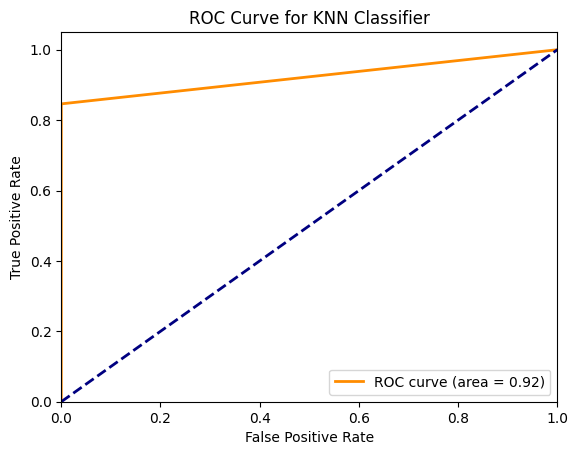

In [100]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()